In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
df=pd.read_csv("data\sales_data - sales_data.csv")

In [3]:
df.head(5)

,OrderID,Product,Category,Quantity,UnitPrice (GHS),OrderDate,CustomerRegion,PurchasedAgain
0,ORD0001,Asaase Wura,Weedicide,39.0,81.69,2023-09-28,Volta,No
1,ORD0002,NPK,Fertilizer,43.0,80.17,2023-01-21,Western,No
2,ORD0003,Asaase Wura,Weedicide,39.0,50.12,2023-08-03,Ashanti,No
3,ORD0004,Maize,Seed,11.0,51.33,2023-04-10,Ashanti region,Yes
4,ORD0005,NPK,Fertilizer,40.0,73.73,2023-05-30,Eastern,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          300 non-null    object 
 1   Product          298 non-null    object 
 2   Category         300 non-null    object 
 3   Quantity         297 non-null    float64
 4   UnitPrice (GHS)  298 non-null    float64
 5   OrderDate        299 non-null    object 
 6   CustomerRegion   297 non-null    object 
 7   PurchasedAgain   300 non-null    object 
dtypes: float64(2), object(6)
memory usage: 18.9+ KB


### Cleaning 

In [5]:
df.isnull().sum()

OrderID            0
Product            2
Category           0
Quantity           3
UnitPrice (GHS)    2
OrderDate          1
CustomerRegion     3
PurchasedAgain     0
dtype: int64

### filling in the missing value 

In [6]:
 # Forward fill for Product
df['Product'].fillna(method='ffill', inplace=True)
# Median for numeric Quantity 
df['Quantity'].fillna(df['Quantity'].median(), inplace=True) 
 # Mean for price 
df['UnitPrice (GHS)'].fillna(df['UnitPrice (GHS)'].mean(), inplace=True) 
# Backward fill for OrderDate
df['OrderDate'].fillna(method='bfill', inplace=True)
# Placeholder for region  
df['CustomerRegion'].fillna("Unknown", inplace=True)  

C:\Users\manca\AppData\Local\Temp\ipykernel_8508\2174936107.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Product'].fillna(method='ffill', inplace=True)
C:\Users\manca\AppData\Local\Temp\ipykernel_8508\2174936107.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['OrderDate'].fillna(method='bfill', inplace=True)


In [7]:
df.isnull().sum()

OrderID            0
Product            0
Category           0
Quantity           0
UnitPrice (GHS)    0
OrderDate          0
CustomerRegion     0
PurchasedAgain     0
dtype: int64

In [8]:
#  OrderDate is in datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

# creating new columns
df['OrderDay'] = df['OrderDate'].dt.day
df['OrderMonth'] = df['OrderDate'].dt.month
df['OrderYear'] = df['OrderDate'].dt.year

# Preview the updated DataFrame
df[['OrderDate', 'OrderDay', 'OrderMonth', 'OrderYear']].head()

,OrderDate,OrderDay,OrderMonth,OrderYear
0,2023-09-28,28,9,2023
1,2023-01-21,21,1,2023
2,2023-08-03,3,8,2023
3,2023-04-10,10,4,2023
4,2023-05-30,30,5,2023


In [9]:
df.head(5)

,OrderID,Product,Category,Quantity,UnitPrice (GHS),OrderDate,CustomerRegion,PurchasedAgain,OrderDay,OrderMonth,OrderYear
0,ORD0001,Asaase Wura,Weedicide,39.0,81.69,2023-09-28,Volta,No,28,9,2023
1,ORD0002,NPK,Fertilizer,43.0,80.17,2023-01-21,Western,No,21,1,2023
2,ORD0003,Asaase Wura,Weedicide,39.0,50.12,2023-08-03,Ashanti,No,3,8,2023
3,ORD0004,Maize,Seed,11.0,51.33,2023-04-10,Ashanti region,Yes,10,4,2023
4,ORD0005,NPK,Fertilizer,40.0,73.73,2023-05-30,Eastern,Yes,30,5,2023


In [10]:
df.drop(columns=['OrderDate'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          300 non-null    object 
 1   Product          300 non-null    object 
 2   Category         300 non-null    object 
 3   Quantity         300 non-null    float64
 4   UnitPrice (GHS)  300 non-null    float64
 5   CustomerRegion   300 non-null    object 
 6   PurchasedAgain   300 non-null    object 
 7   OrderDay         300 non-null    int32  
 8   OrderMonth       300 non-null    int32  
 9   OrderYear        300 non-null    int32  
dtypes: float64(2), int32(3), object(5)
memory usage: 20.1+ KB


In [12]:
df['Product'].unique()

array(['Asaase Wura', 'NPK', 'Maize', 'soyabean', 'tomato',
       'Ammonia Sulphate', 'MAIZE', 'maize'], dtype=object)

In [13]:
# Strip whitespace and standardize to title case
df['Product'] = df['Product'].str.strip().str.title()

# Check unique values after cleaning
print(df['Product'].unique())

['Asaase Wura' 'Npk' 'Maize' 'Soyabean' 'Tomato' 'Ammonia Sulphate']


In [14]:
df['Category'].unique()

array(['Weedicide', 'Fertilizer', 'Seed'], dtype=object)

In [15]:
df['CustomerRegion'].unique()

array(['Volta', 'Western', 'Ashanti', 'Ashanti region', 'Eastern',
       'Eastern Region', 'eastern reg', 'Northern', 'Volta_reg',
       'ashanti', 'Unknown', 'ASHANTI', 'eastern region', 'Volta_region'],
      dtype=object)

In [16]:
df['CustomerRegion'] = (
    df['CustomerRegion']
    .str.lower()  # lowercase everything
    .str.replace(r'(\s|_)?region', '', regex=True)  # removing 'region' with optional space or underscore anywhere
    .str.replace(r'(\s|_)?reg', '', regex=True)     # removing 'reg' similarly
    .str.strip()  # removing leading/trailing whitespace
    .str.title()  # convert to title case
)

print(df['CustomerRegion'].unique())

['Volta' 'Western' 'Ashanti' 'Eastern' 'Northern' 'Unknown']


### Univariate Analysis 

C:\Users\manca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


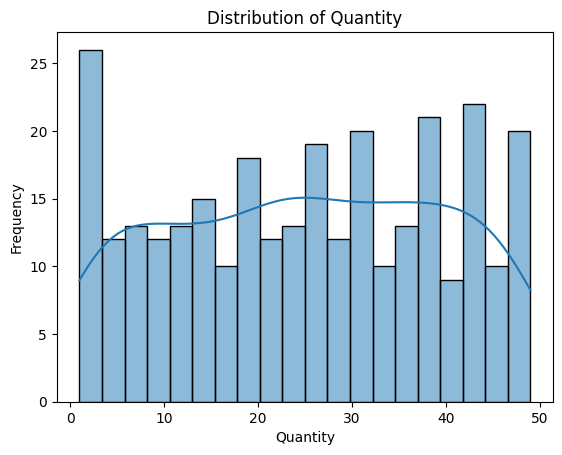

In [17]:

plt.figure()
sns.histplot(df['Quantity'], kde=True, bins=20)
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

C:\Users\manca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


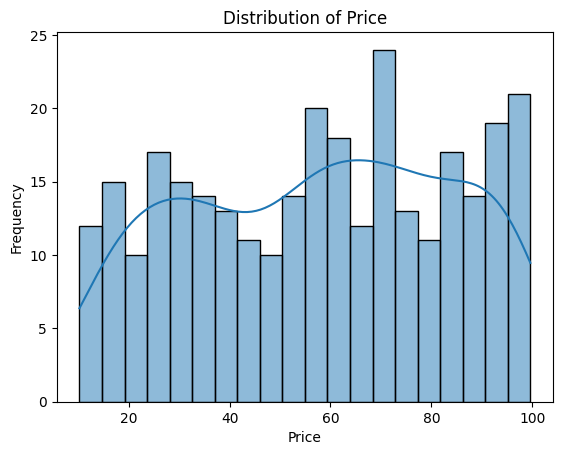

In [18]:

plt.figure()
sns.histplot(df['UnitPrice (GHS)'], kde=True, bins=20)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

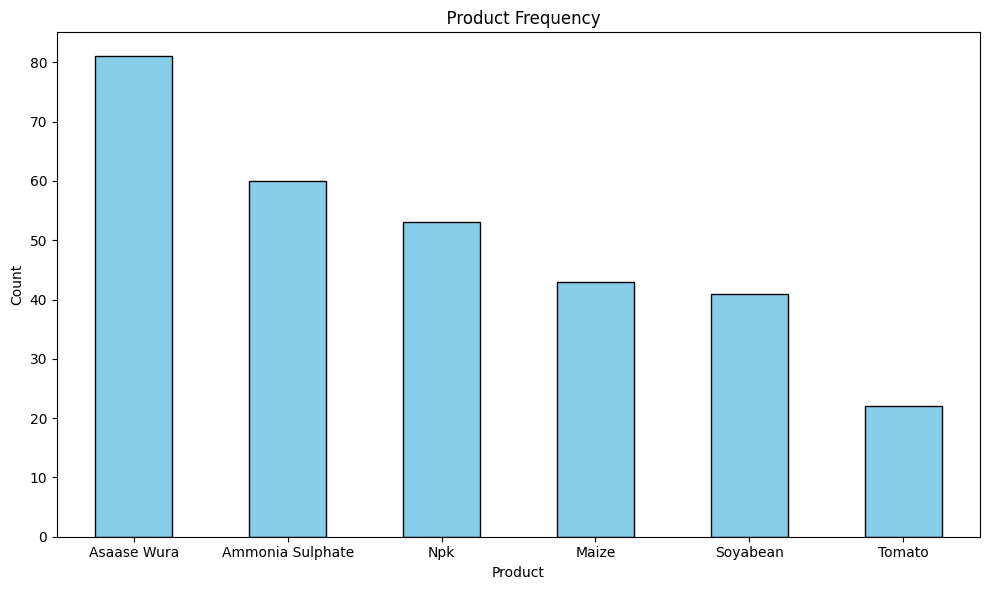

In [19]:
# Value counts for Product
product_counts = df['Product'].value_counts()

# Bar plot for Product
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("  Product Frequency")
plt.xlabel("Product")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


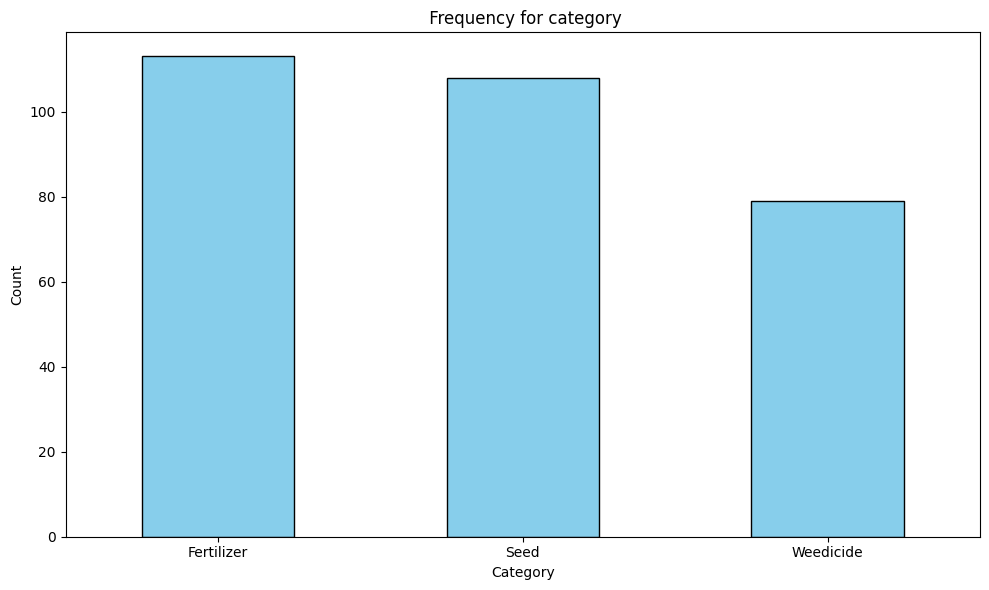

In [20]:
# Value counts for Category
product_counts = df['Category'].value_counts()

# Bar plot for tCategory
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(" Frequency for category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

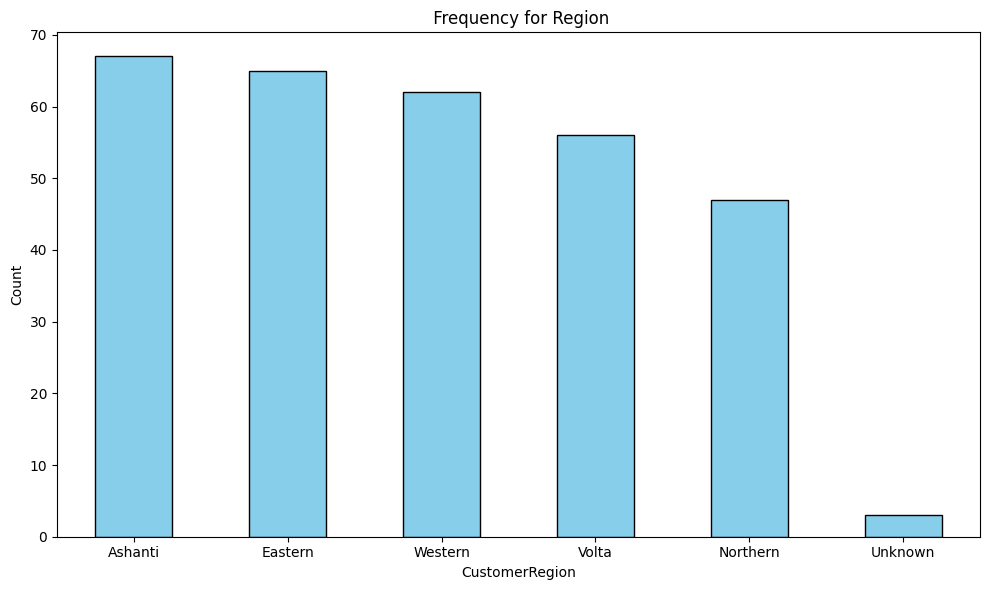

In [21]:
# Value counts forCustomerRegion
product_counts = df['CustomerRegion'].value_counts()

# Bar plot for CustomerRegion
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(" Frequency for Region")
plt.xlabel("CustomerRegion")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

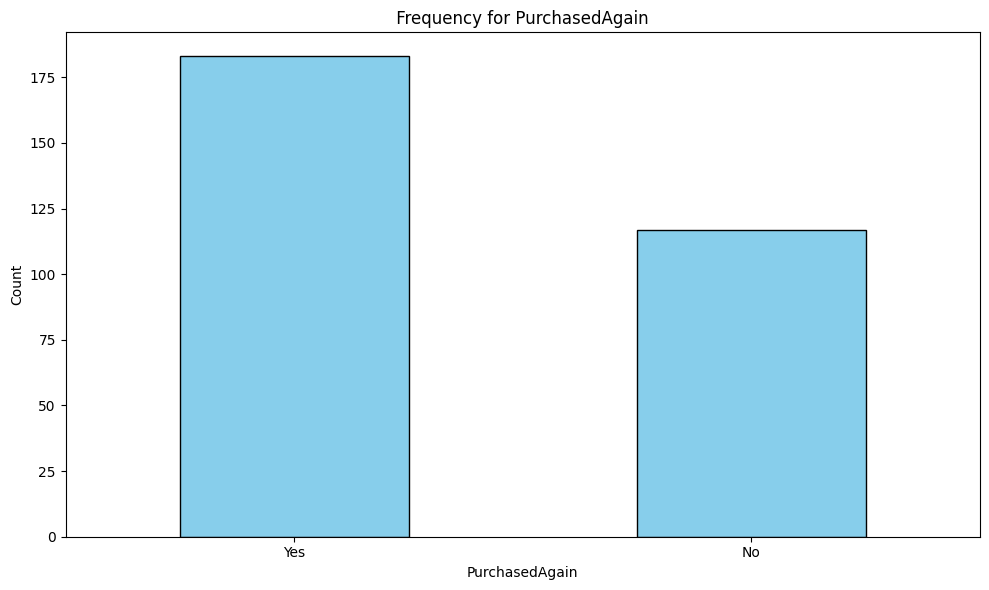

In [22]:
# Value counts for  PurchasedAgain
product_counts = df['PurchasedAgain'].value_counts()

# Bar plot for  PurchasedAgain
plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(" Frequency for PurchasedAgain ")
plt.xlabel( "PurchasedAgain")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### BIVARIATE ANALYSIS


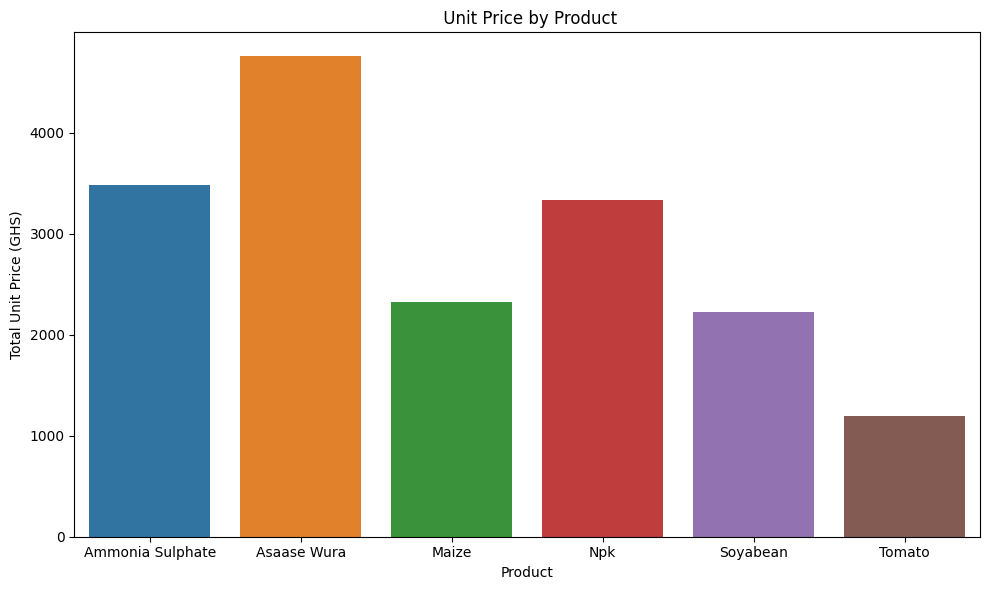

In [23]:
# Step 1: Group by Product and sum the Unit Price
product_totals = df.groupby('Product')['UnitPrice (GHS)'].sum().reset_index()

# Step 2: Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=product_totals, x='Product', y='UnitPrice (GHS)')
plt.title(" Unit Price by Product")
plt.xticks(rotation=0)
plt.ylabel("Total Unit Price (GHS)")
plt.tight_layout()
plt.show()

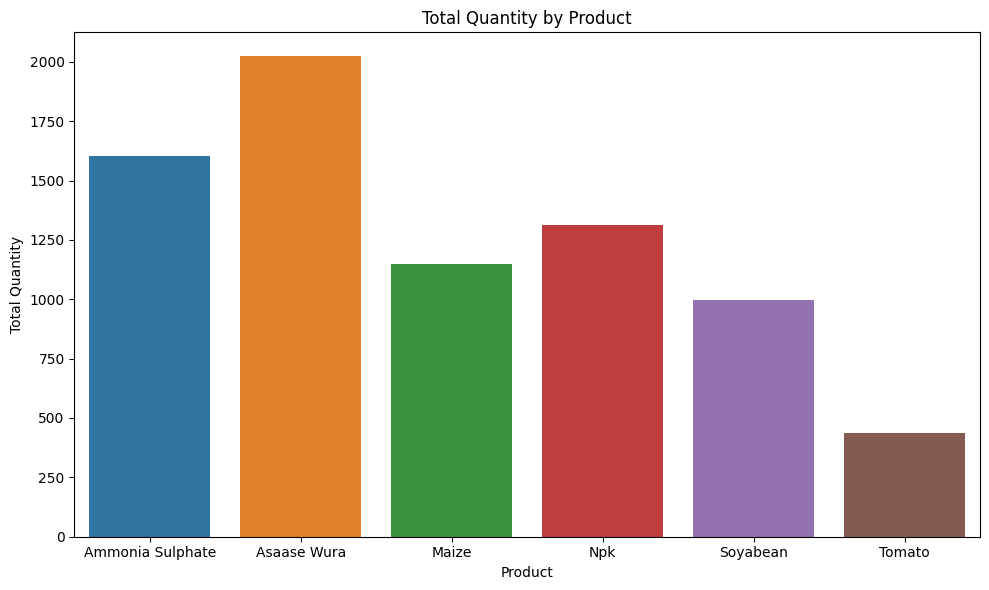

In [24]:
# Group by Product and sum Quantity
product_qty = df.groupby('Product')['Quantity'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=product_qty, x='Product', y='Quantity')
plt.title("Total Quantity by Product")
plt.xticks(rotation=0)
plt.ylabel("Total Quantity")
plt.tight_layout()
plt.show()

### Multivariate 


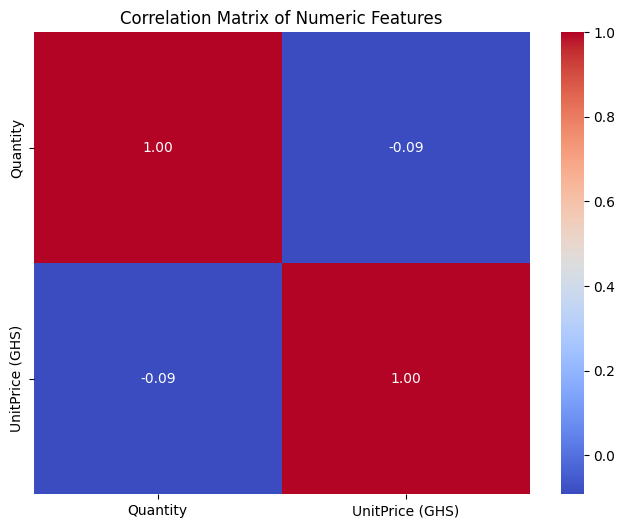

In [27]:
#  Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

### 